In [36]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [37]:
# Prepare features and labels
X = data.values[:, :-1]
y = data.values[:, -1]


In [38]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
dataX=pd.read_csv('../data/datasetLSTMX.csv', engine='python')
dataX.head()

,20201,1212000,0.000645609
0,19521,1171200,0.000659
1,19245,1154640,0.000738
2,20202,1212060,0.000662
3,20202,1212060,0.000671
4,20661,1239600,0.000738


In [40]:
# Prepare features and labels
X = data.values[:, :-1]
y = data.values[:, -1]


In [41]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [42]:
#Transform dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=4)

In [43]:
# Define the model
model = Sequential([
    Dense(12, activation='relu', input_dim=X_train.shape[1]),
    Dense(15, activation='relu'),
    Dense(18, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/dasha/Downloads/Darya DDOA paper simulation/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

In [45]:
# Train the model
hist = model.fit(X_train, y_train,
                 batch_size=57, epochs=100, validation_split=0.2)

# Save the model

model.save("models/model_flow_lstm.h5")

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1952 - loss: nan - val_accuracy: 0.1583 - val_loss: nan
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.2062 - loss: nan - val_accuracy: 0.1583 - val_loss: nan
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.2265 - loss: nan - val_accuracy: 0.1583 - val_loss: nan
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.2132 - loss: nan - val_accuracy: 0.1583 - val_loss: nan
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.2087 - loss: nan - val_accuracy: 0.1583 - val_loss: nan
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.2262 - loss: nan - val_accuracy: 0.1583 - val_loss: nan
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.2093 - loss: nan - val_accuracy: 0.1583 - val_loss: nan
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.2335 - loss: nan - val_accuracy: 0.1583 - val_loss: nan
Epoch 9/100
26/26 

In [46]:
model.save("models/model_flow.h5")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       199
           1       0.00      0.00      0.00         1

    accuracy                           0.99       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.99      0.99      0.99       200



/Users/dasha/Downloads/Darya DDOA paper simulation/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dasha/Downloads/Darya DDOA paper simulation/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dasha/Downloads/Darya DDOA paper simulation/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

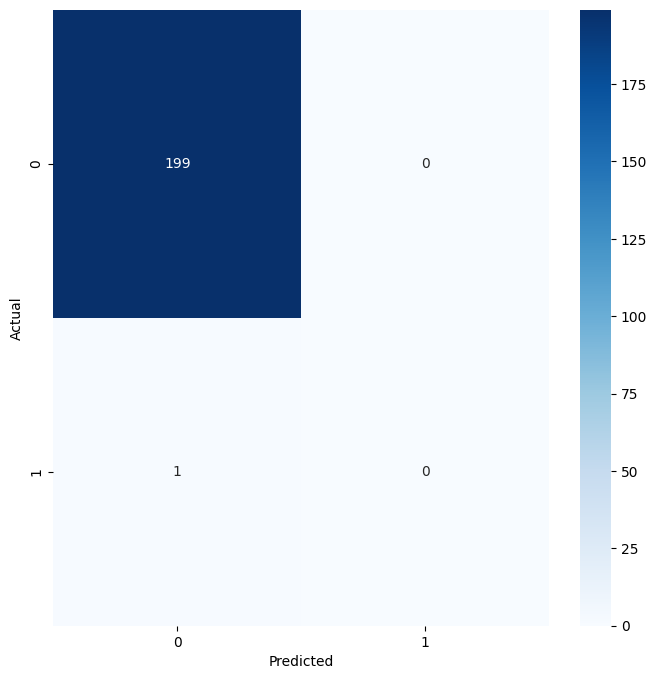

In [51]:
# Ensure y_test has no NaN values
y_test = np.nan_to_num(y_test, nan=0)  # Or remove them as needed

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Print confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

print(f'Classification Report: \n {classification_report(y_test, y_pred)}')
